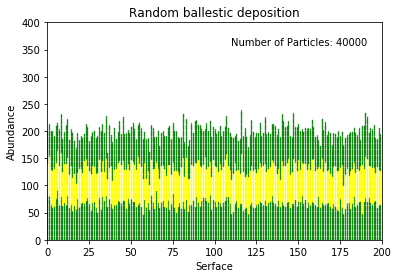

In [4]:
import matplotlib.pyplot as plt
import random as rand
import numpy as np
import time
from IPython.display import clear_output
import matplotlib.ticker as mtick


############initializing
serface = []
x = []
y = []
length_of_serface = 200
Number_of_particles = 40000
s = 0.1
h_average=[]
w = []
logw = []
time = []
logtime = []
for i in range(length_of_serface):
    serface.append(0)
    
for i in range (Number_of_particles):
    pixel = rand.randint(0,length_of_serface-1)
    serface[pixel] += 1
    x.append(pixel)
    y.append(serface[pixel])
    
    if (i+1) % 100 == 0:
        time.append((i+1))
        h_average.append(np.average(serface))
        w.append(np.std(serface))
        
    if i>(25*length_of_serface) and ((np.log2(i+1) - int(np.log2(i+1))) == 0 or (np.log10(i+1) - int(np.log10(i+1)))):
        logtime.append(np.log10(i+1))
        logw.append(np.log10(np.std(serface)))
    #####animation block
    if (i+1) % 10000 == 0:
        clear_output(wait=True)
        fig, ax = plt.subplots()
        ax.set(xlabel='Serface', ylabel='Abundance',title=('Random ballestic deposition'))
        plt.figtext(0.55,0.80,'Number of Particles: '+ str(i+1) )
        plt.ylim(0,int(2 *(Number_of_particles/length_of_serface)))
        plt.xlim(0,200)
        if len(x) <int(Number_of_particles/3):
                plt.scatter(x, y, s , 'g')
        elif len(x)<int(2 *Number_of_particles/3):
            plt.scatter(x[:int(Number_of_particles/3)] , y[:int(Number_of_particles/3)], s , 'g')
            plt.scatter(x[int(Number_of_particles/3):] , y[int(Number_of_particles/3):], s , 'yellow')
        else:
            plt.scatter(x[:int(Number_of_particles/3)] , y[:int(Number_of_particles/3)], s , 'g')
            plt.scatter(x[int(Number_of_particles/3):int(2 *Number_of_particles/3)] , y[int(Number_of_particles/3):int(2 *Number_of_particles/3)], s , 'yellow')
            plt.scatter(x[int(2 *Number_of_particles/3):] , y[int(2 *Number_of_particles/3):], s , 'g')
        plt.pause(0.005)    
    
plt.show() 
          

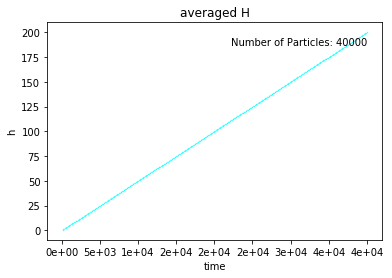

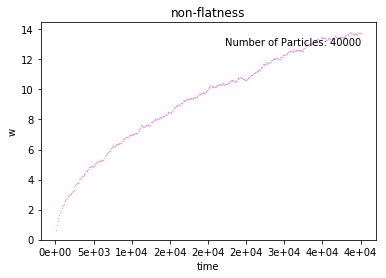

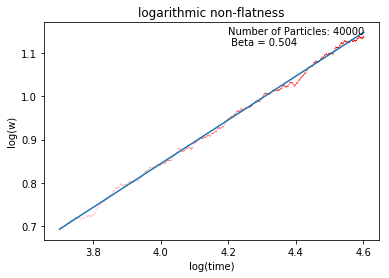

In [5]:
####plotting averaged H(t)
fig, ax = plt.subplots()
ax.set(xlabel='time', ylabel='h',title=('averaged H'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.figtext(0.55,0.80,'Number of Particles: '+ str(Number_of_particles) )
plt.scatter(time,h_average,0.1 ,'aqua')

####plotting W-t 
fig, ax = plt.subplots()
ax.set(xlabel='time', ylabel='w',title=('non-flatness'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
plt.figtext(0.55,0.80,'Number of Particles: '+ str(Number_of_particles) )
plt.scatter(time,w,0.1 ,'violet')

#######plotting log(W) - log(t)
fig, ax = plt.subplots()
ax.set(xlabel='log(time)', ylabel='log(w)',title=('logarithmic non-flatness'))
plt.scatter(logtime,logw,0.00001 ,'r')
plt.plot(np.unique(logtime), np.poly1d(np.polyfit(logtime, logw, 1))(np.unique(logtime)))
beta=np.polyfit(logtime, logw, 1)
plt.figtext(0.55,0.80,'Number of Particles: '+ str(Number_of_particles)+'\n Beta = '+ str(round(beta[0],3)) )

    
plt.show()


